In [8]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import math
import numpy as np
import scipy 
import cmath
from numba import objmode
from numpy.linalg import slogdet
from bempp.api.operators.far_field import helmholtz as helmholtz_farfield
import matplotlib.pyplot as plt

In [9]:
err_02_3 = [0.023072050757196698, 0.02318923534587724, 0.02330550316136991, 0.02341483995737424, 0.023523489845058157, 
            0.02362577812035709, 0.023724176294845238, 0.023819127114560395, 0.023912311298211236, 0.02399576028982842,
            0.02407677889813394, 0.02414908507697246, 0.024218206535811637, 0.024282884737371408, 0.02433860862321291, 
            0.0243926610534636, 0.024437612070856915, 0.02447379553868894, 0.024509569263191956, 0.02453463938234679, 
            0.02455707758010924, 0.02457066110006116, 0.024576548458318352, 0.024575967826654468, 0.024570166867883256, 
            0.02456028849140241, 0.024540189286490332, 0.024515023227292425, 0.024486167139196425, 0.02444751567643592, 
            0.024404049449569275, 0.024350976504355238, 0.024297634573076224, 0.024235045132392614, 0.02416613387646873, 
            0.02409429640819319, 0.024015071898003882, 0.023931272893833715, 0.023840200629747264, 0.023748403901428256, 
            0.023648867193346603, 0.02354572761243402, 0.02344081144005961, 0.023330588715301807, 0.02321812583830014, 
            0.023101439750186623, 0.022979483900998427, 0.02285774857845687, 0.02273338975648731, 0.022611184736053936, 
            0.02248537721221163, 0.022360253280724482, 0.022231978472529407, 0.02210461285187888, 0.02198134713567, 
            0.02185738763030796, 0.02173793272593598, 0.02162055701382338, 0.021503810683609348, 0.02139431735060648, 
            0.021289843201125914, 0.021189943739696196, 0.02109520691998632, 0.021005388336211208, 0.020922509240312834, 
            0.020849629330338224, 0.020781971134411357, 0.020722616255355583, 0.020674830299498882, 0.02063429571590465, 
            0.020602522810662226, 0.020579456909756655, 0.020568141295279386, 0.020565695063188824, 0.020574558465941882, 
            0.020591261119115342, 0.020618326250042323, 0.020656345125269832, 0.020701735952646946, 0.020757350305068988, 
            0.02082185796195993, 0.020892275818421235, 0.020974143426166224, 0.02105966273512784, 0.021153694819051765, 
            0.021255270093211202, 0.021359027296335986, 0.021469671354455502, 0.021585299649735434, 0.021700915996292373, 
            0.021825433380325783, 0.021948442862987257, 0.022073407627579908, 0.022199653472780825, 0.022326904233373104, 
            0.0224531602364867, 0.02257865985041832, 0.022704547438536133, 0.022830184390820116, 0.02295091168082564, 0.023072662914371066]

err_015_3 = [0.01211521736834261, 0.012175608750757586, 0.01223650827627922, 0.01229200425103002, 0.012348568334777103, 
             0.012400614626181439, 0.012450783081194875, 0.01249965243591852, 0.012549043263607982, 0.012591017135274461,
             0.012633061575331969, 0.01266892719446718, 0.012704290253162805, 0.012737964348957407, 0.01276546094904003, 
             0.012794216308227425, 0.012816775614258404, 0.012833530667352355, 0.0128529814053149, 0.012864757437531031, 
             0.01287705250069634, 0.012883598960797202, 0.012885586575717489, 0.012884269105074326, 0.012880912159513971, 
             0.012876674492499978, 0.012865319476473566, 0.012852049416308941, 0.012838229608084928, 0.01281765140388786, 
             0.012795318720045924, 0.01276632236332346, 0.012740060588060277, 0.01270738371735935, 0.012671179994650601, 
             0.012634804461160573, 0.012593661254261772, 0.012550484527142122, 0.012502444397656964, 0.012456049995984772, 
             0.01240407971721685, 0.012350592748848444, 0.012297275339566732, 0.01224041139815933, 0.012182938083278996, 
             0.012122675333700013, 0.0120583895503174, 0.011995417884247017, 0.01193068721851775, 0.011868810218307888, 
             0.011803739073734746, 0.01173956863769353, 0.01167218439763008, 0.011605413040156486, 0.011542222826614988, 
             0.011477494628684283, 0.011416201676770914, 0.011355616306695961, 0.011293966800783138, 0.0112376653517114, 
             0.011184165535230689, 0.011132732394195046, 0.011083680233098372, 0.011036496031046132, 0.01099294894033424, 
             0.010955889267335971, 0.010920260699903699, 0.010888964704611644, 0.010865111255763444, 0.01084416921478431, 
             0.010827527070283675, 0.010815017242617804, 0.010809631033835119, 0.010808404760428256, 0.010813789173812665, 
             0.010822292414787021, 0.010836508120165789, 0.01085711598318172, 0.010880611473078916, 0.010910011530248235, 
             0.010944162508092905, 0.010980248055951594, 0.011024089941654571, 0.011068061150312338, 0.011117330073947483, 
             0.011171220938001603, 0.011224602567993257, 0.011282530438558445, 0.011343386145052111, 0.011402432457785197, 
             0.011468965853928353, 0.011532793453637898, 0.011597695886318949, 0.011663274814744166, 0.011729527702900427, 
             0.011794688259309826, 0.011859266172477855, 0.01192464819611069, 0.011990417578170622, 0.012052081225788436, 0.012115832800198102]

err_01_3 = [0.005439959051493228, 0.005465433568081607, 0.005492284199492537, 0.005514661599661703, 0.005539171949685043, 
            0.005560291476240765, 0.005580762397415124, 0.0056012462607395305, 0.005623645927157778, 0.005640054642279497, 
            0.005658059922370847, 0.005671444275530371, 0.005685967286684183, 0.005700492527948544, 0.005710546292712374, 
            0.005723658432817891, 0.005732362944168314, 0.0057370877029902225, 0.005746415373393377, 0.005749943086799116, 
            0.005755922273156961, 0.005758069160357473, 0.0057575921228202554, 0.005755760990796512, 0.005753851525421254, 
            0.005753039842055874, 0.00574702088500961, 0.0057410334593179044, 0.005736431970197385, 0.005726948942886076, 
            0.005717603795184709, 0.005703407244056634, 0.005693798521620545, 0.005679522248206024, 0.00566344329557436, 
            0.0056488912855548355, 0.005631187209673906, 0.005613014111544869, 0.005591462338056676, 0.005573015252058371, 
            0.005550324406151207, 0.005527400454053168, 0.005505841832601358, 0.005481818160595929, 0.005458186327766561, 
            0.005432644748749659, 0.00540384448841494, 0.005377027733584681, 0.005348980487196214, 0.0053242137055524935, 
            0.0052965006089355435, 0.005269818192188339, 0.005239880068920753, 0.005210369337152954, 0.005184117504601369, 
            0.005155805938409193, 0.005130269418910472, 0.005104594748759997, 0.0050768130815009565, 0.005053206466130118, 
            0.005031036805334286, 0.005009390862204371, 0.004988415435880363, 0.004967430767828024, 0.004948053927467098, 
            0.004933005634266281, 0.004917058607058903, 0.0049030037600047635, 0.004893852407971854, 0.004884948169449381, 
            0.004877602959537824, 0.00487157957389484, 0.0048698377380243865, 0.0048693592188909975, 0.004872610281522748, 
            0.004876083899696489, 0.0048824140532903815, 0.004892337961412489, 0.004902398301955008, 0.00491570852909879, 
            0.004931233623436512, 0.004946256770428179, 0.004966771174273617, 0.004985254805247698, 0.0050070606399301495, 
            0.005031701587616798, 0.005054183216904794, 0.005079775988769037, 0.005107031141255784, 0.0051313754317954775, 
            0.0051623324823058874, 0.005189849735309488, 0.005217897742346289, 0.005246244056951774, 0.005275056259073667, 
            0.005302712434703465, 0.00532988367587954, 0.005358104976306632, 0.005387096732646197, 0.005412469814025392, 0.005440577841563212]

err_005_3 = [0.0006038756607343322, 0.000603664979248519, 0.0006054501366398552, 0.0006034733032617193, 0.0006042505631425565, 
             0.0006025113098917794, 0.0006010055205786135, 0.0006004185318610683, 0.0006026002939519524, 0.0006000141511849351, 
             0.0005999609822510118, 0.0005965442999556042, 0.0005953352056256376, 0.0005953479449449607, 0.0005921631900201958, 
             0.0005932764108371204, 0.0005913497444564221, 0.0005868223574513252, 0.0005881538309126621, 0.0005853002500855961, 
             0.0005861014851703575, 0.0005845426975213067, 0.0005818120704294189, 0.0005791826255039704, 0.0005779063889370206, 
             0.000579337360021741, 0.0005768867899808176, 0.0005759555654712305, 0.000577805938205991, 0.0005762456187621445, 
             0.0005763286725254989, 0.0005728374596963233, 0.0005753295403991106, 0.0005744743389375413, 0.0005731208598574233, 
             0.0005745828212555567, 0.00057412730824794, 0.0005743499295315942, 0.0005723117368282558, 0.0005744663919544079, 
             0.0005733751414894667, 0.0005730160812589044, 0.000574900049029928, 0.0005751226994499532, 0.0005764781177415851, 
             0.0005765730591206224, 0.0005739726226130083, 0.0005738447356268236, 0.0005728720249183093, 0.0005754891443516751, 
             0.0005753372008518858, 0.0005763057770290927, 0.0005739821308210775, 0.0005719436564547723, 0.000572921506309607, 
             0.0005714516360055637, 0.0005722672991608159, 0.0005723162338824724, 0.0005694927141593942, 0.0005699813021559705, 
             0.0005709049048492991, 0.0005712190689580617, 0.0005709574250966009, 0.0005692815282690206, 0.0005677512599172848, 
             0.000568973231743852, 0.000567595610655737, 0.0005663297995228553, 0.0005680527650187724, 0.0005681266994320639, 
             0.0005677687385255474, 0.0005666793327306188, 0.0005677928719352688, 0.0005679715689688873, 0.0005698564448673346, 
             0.000569883360459592, 0.0005706460387592287, 0.0005729727406512894, 0.0005734323091792821, 0.000575095914056801, 
             0.0005772065086101726, 0.0005770684874214051, 0.0005807419075399283, 0.000580808148409164, 0.0005826579021789, 
             0.0005861094106957233, 0.0005862140268078729, 0.0005883797783206593, 0.0005912068731847391, 0.0005903843274835979, 
             0.0005953919255123837, 0.0005965152626188451, 0.0005977562584071034, 0.0005989528549368429, 0.0006004524405296317, 
             0.0006007887476171261, 0.000600654652342826, 0.0006016765387898004, 0.0006037027080517813, 0.0006025115950413465, 0.0006045178429904662]

In [ ]:
(-0.2740237876794605-0.08044231509359151j) 0
(-0.2718063252034065-0.07934970238413952j) 1
(-0.26968126237551227-0.0781447196797929j) 2

-0.27419 - 0.0804887j, -0.271971 - 0.0793959j, -0.269845 - 0.0781908j

In [7]:
np.linalg.norm(-0.269845 - 0.0781908j - (-0.26968126237551227-0.0781447196797929j)) / np.linalg.norm(-0.269845 - 0.0781908j)

0.0006054501366398552

In [14]:
max_index_02_3 = err_02_3.index(max(err_02_3))
print(max_index_02_3, angle_[max_index_02_3], 0.1*np.exp(1j*angle_[max_index_02_3]) + 0.1 + 0.1j)

22 1.3823 (0.1187382068569235+0.1982287106898342j)


In [15]:
max_index_015_3 = err_015_3.index(max(err_015_3))
print(max_index_015_3, angle_[max_index_015_3], 0.1*np.exp(1j*angle_[max_index_015_3])+ 0.1 + 0.1j)

22 1.3823 (0.1187382068569235+0.1982287106898342j)


In [16]:
max_index_01_3 = err_01_3.index(max(err_01_3))
print(max_index_01_3, angle_[max_index_01_3], 0.1*np.exp(1j*angle_[max_index_01_3])+ 0.1 + 0.1j)

21 1.31947 (0.12486888357751579+0.19685834310790148j)


In [17]:
max_index_005_3 = err_005_3.index(max(err_005_3))
print(max_index_005_3, angle_[max_index_005_3], 0.1*np.exp(1j*angle_[max_index_005_3])+ 0.1 + 0.1j)

2 0.125664 (0.19921146644844612+0.11253335251035616j)


In [18]:
min_index_02_3 = err_02_3.index(min(err_02_3))
print(min_index_02_3, angle_[min_index_02_3], 0.1*np.exp(1j*angle_[min_index_02_3]) + 0.1 + 0.1j)

73 4.58673 (0.08746714549319769+0.0007884706401956321j)


In [19]:
min_index_015_3 = err_015_3.index(min(err_015_3))
print(min_index_015_3, angle_[min_index_015_3], 0.1*np.exp(1j*angle_[min_index_015_3])+ 0.1 + 0.1j)

73 4.58673 (0.08746714549319769+0.0007884706401956321j)


In [20]:
min_index_01_3 = err_01_3.index(min(err_01_3))
print(min_index_01_3, angle_[min_index_01_3], 0.1*np.exp(1j*angle_[min_index_01_3])+ 0.1 + 0.1j)

73 4.58673 (0.08746714549319769+0.0007884706401956321j)


In [21]:
min_index_005_3 = err_005_3.index(min(err_005_3))
print(min_index_005_3, angle_[min_index_005_3], 0.1*np.exp(1j*angle_[min_index_005_3])+ 0.1 + 0.1j)

67 4.20973 (0.051824268413809826+0.012369532204059536j)


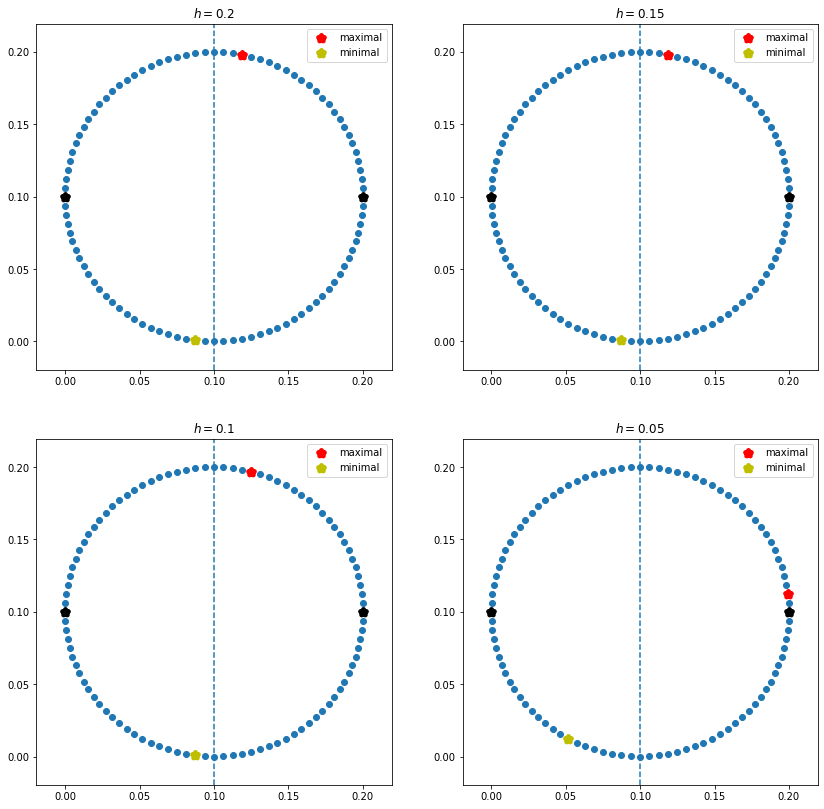

In [25]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))
ax1.scatter(np.array(points_on_sphere).real, np.array(points_on_sphere).imag, label='_nolegend_')
ax1.scatter(np.array(0.1*np.exp(1j*angle_[max_index_02_3])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[max_index_02_3])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'red')
ax1.scatter(np.array(0.1*np.exp(1j*angle_[min_index_02_3])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[min_index_02_3])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'y')
ax1.scatter(np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).imag,marker = '*', linewidths = 5, color = 'k')
ax1.scatter(np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'k')
ax1.legend(['maximal', 'minimal'])
ax1.axvline(x=0.1, linestyle = '--')
ax1.set_title('$h = 0.2$')

ax2.scatter(np.array(points_on_sphere).real, np.array(points_on_sphere).imag, label='_nolegend_')
ax2.scatter(np.array(0.1*np.exp(1j*angle_[max_index_015_3])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[max_index_015_3])+ 0.1 + 0.1j).imag,marker = '*', linewidths = 5, color = 'red')
ax2.scatter(np.array(0.1*np.exp(1j*angle_[min_index_015_3])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[min_index_015_3])+ 0.1 + 0.1j).imag,marker = '*', linewidths = 5, color = 'y')
ax2.scatter(np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).imag,marker = '*', linewidths = 5, color = 'k')
ax2.scatter(np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'k')
ax2.legend(['maximal', 'minimal'])
ax2.axvline(x=0.1, linestyle = '--')
ax2.set_title('$h = 0.15$')

ax3.scatter(np.array(points_on_sphere).real, np.array(points_on_sphere).imag, label='_nolegend_')
ax3.scatter(np.array(0.1*np.exp(1j*angle_[max_index_01_3])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[max_index_01_3])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5, color = 'red')
ax3.scatter(np.array(0.1*np.exp(1j*angle_[min_index_01_3])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[min_index_01_3])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'y')
ax3.scatter(np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).imag,marker = '*', linewidths = 5, color = 'k')
ax3.scatter(np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'k')
ax3.legend(['maximal', 'minimal'])
ax3.axvline(x=0.1, linestyle = '--')
ax3.set_title('$h = 0.1$')

ax4.scatter(np.array(points_on_sphere).real, np.array(points_on_sphere).imag, label='_nolegend_')
ax4.scatter(np.array(0.1*np.exp(1j*angle_[max_index_005_3])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[max_index_005_3])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5, color = 'red')
ax4.scatter(np.array(0.1*np.exp(1j*angle_[min_index_005_3])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[min_index_005_3])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5, color = 'y')
ax4.scatter(np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).imag,marker = '*', linewidths = 5, color = 'k')
ax4.scatter(np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'k')
ax4.legend(['maximal', 'minimal'])
ax4.axvline(x=0.1, linestyle = '--')
ax4.set_title('$h = 0.05$')
fig.savefig('four spheres with maximal and minimal_dist = 05.pdf')

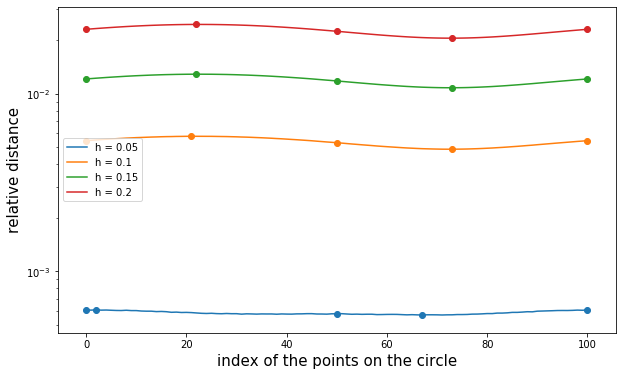

In [23]:
plt.figure(figsize = [10,6])
plt.semilogy(range(len(angle_)), err_005_3)
plt.semilogy(range(len(angle_)), err_01_3)
plt.semilogy(range(len(angle_)), err_015_3)
plt.semilogy(range(len(angle_)), err_02_3)
plt.scatter([0, max_index_005_3, 50, min_index_005_3, 100], [err_005_3[0], err_005_3[max_index_005_3], err_005_3[50], err_005_3[min_index_005_3], err_005_3[-1]])
plt.scatter([0, max_index_01_3,  50, min_index_01_3,  100], [err_01_3[0],  err_01_3[max_index_01_3], err_01_3[50], err_01_3[min_index_01_3], err_01_3[-1]])
plt.scatter([0, max_index_015_3, 50, min_index_015_3, 100], [err_015_3[0], err_015_3[max_index_015_3], err_015_3[50], err_015_3[min_index_015_3], err_015_3[-1]])
plt.scatter([0, max_index_02_3,  50, min_index_02_3,  100], [err_02_3[0],  err_02_3[max_index_02_3], err_02_3[50], err_02_3[min_index_02_3], err_02_3[-1]])

plt.xlabel('index of the points on the circle', fontsize = 15)
plt.ylabel('relative distance', fontsize = 15)
plt.legend(['h = 0.05', 'h = 0.1', 'h = 0.15', 'h = 0.2'])
plt.savefig('relative distance along the whole circle_dist = 05.pdf')

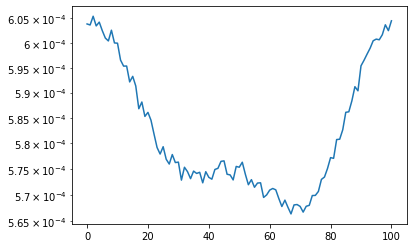

In [34]:
plt.semilogy(range(len(angle_)), err_005_3)

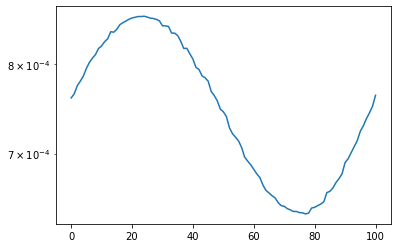

In [39]:
plt.semilogy(range(len(angle_)), err_005)

In [17]:
err_02 = [0.011837473917126246, 0.011947361801736089, 0.012060159953551763, 0.012166761694504665, 0.012271564478216318, 
          0.012376372730021104, 0.012476046523144328, 0.01257000519580917, 0.012659267493979283, 0.01274719379651635, 
          0.012826539682604617, 0.012903193294132309, 0.012973269865236642, 0.013043432508364402, 0.01309904608269143, 
          0.013153571821153327, 0.013204415324130907, 0.013246569274942072, 0.013282566663207549, 0.013312790397005411, 
          0.013336691567925432, 0.013353967350742122, 0.013365369382099928, 0.013369940550685931, 0.013368947543985647, 
          0.013360713827831007, 0.013346350383034885, 0.01332712181722983, 0.01330156630482779, 0.013269626321304736, 
          0.013227818313798035, 0.013186886206676698, 0.01313989127184272, 0.01308056751758283, 0.013024334525278444, 
          0.012960557086362049, 0.012888191496995934, 0.01280985046051357, 0.012736376305184717, 0.01265229195778488, 
          0.012565171201988802, 0.012471256062287677, 0.012381720142478523, 0.012284843683570076, 0.012190858603252695, 
          0.012093383812481276, 0.011986629901412726, 0.011885755651108979, 0.011782981930504883, 0.011676640195231727, 
          0.011576605586761626, 0.011474924298416912, 0.01136720094136063, 0.011266571974102656, 0.011170363941235245, 
          0.011075895732644322, 0.010981045332430722, 0.010885735743892426, 0.010799437859056966, 0.010716661488178895, 
          0.010636777649504494, 0.010560616958694573, 0.010489331405169043, 0.010418407003953554, 0.010353797008446606, 
          0.010296279763245392, 0.010243079793266911, 0.01019494953563152, 0.010149058477973712, 0.010109557691560573, 
          0.010077082414978523, 0.010048094405683175, 0.010025273063222232, 0.010007421157615461, 0.009996673137378119, 
          0.009990559847760535, 0.00999128715431982, 0.00999735326272684, 0.010011609642092465, 0.010036494088678408, 
          0.010063998651817176, 0.0100991304642185, 0.01014108156888017, 0.010190458854335135, 0.010253448929951224, 
          0.010315274341982086, 0.010385593810180681, 0.010463857778281217, 0.010546482038695489, 0.010635362031400924, 
          0.010735602346284824, 0.010832643412465679, 0.01093591633905423, 0.011042295080816415, 0.011151355255278356, 
          0.011266187068312644, 0.011378361423467796, 0.011493133398946106, 0.011607055379425699, 0.01172153929478211, 
          0.01184044698353378]
err_015 = [0.006323456709890437, 0.006380562370471523, 0.00644147500580049, 0.006497247089809608, 0.00655252244424445,
           0.006609315369255773, 0.006662627786050732, 0.006712045190482372, 0.0067587469510660345, 0.006806264681523695,
           0.006847422205299758, 0.006888271385651361, 0.00692500345854385, 0.006964425760775055, 0.006991870460095936, 
           0.007020979124612345, 0.007049196654399521, 0.007071528349927299, 0.007090573711127299, 0.00710676463198343, 
           0.007119549590087636, 0.007128656333709018, 0.007134846445025895, 0.007137165080292808, 0.007136874316672142, 
           0.0071322875195960036, 0.007124477760614012, 0.0071146975756480645, 0.007101437910236427, 0.007084595514141416, 
           0.007060620396846725, 0.0070402399308589, 0.007016413136646637, 0.006982758210360559, 0.006954697346171309, 
           0.0069214360009632785, 0.006881827136203449, 0.006838368585040468, 0.006801852701950614, 0.006756577335793971, 
           0.006710020273421314, 0.006658258753450815, 0.006612357410814623, 0.006560368054946902, 0.006512406260938999, 
           0.006461870780033471, 0.00640275754240346, 0.006350099950309337, 0.0062958819213994295, 0.00623822186948439, 
           0.006186843318875713, 0.006133542423359307, 0.006073703751944867, 0.006020318273676024, 0.005970510442095604, 
           0.005921397827247264, 0.0058706705970587685, 0.005818092706412376, 0.005773019135251215, 0.005729801035398785, 
           0.005687684917970874, 0.005647399913362275, 0.005610012374121353, 0.005570910637587691, 0.005536007439987145, 
           0.005506031603916232, 0.005478140624199735, 0.005453047547000586, 0.005427850072091459, 0.005406676218690162, 
           0.005390096709597939, 0.005374492867514535, 0.005362468927960127, 0.005352729120990164, 0.005347327580757262, 
           0.005343671964203443, 0.005343869657750011, 0.005346303198875683, 0.005353731263384007, 0.00536849906698312, 
           0.0053825215764707595, 0.005400759779269351, 0.005422382128030114, 0.0054480180640970495, 0.005483899724515985, 
           0.0055152972767696295, 0.005552010742191457, 0.005593638872867075, 0.0056367671188501545, 0.0056835087254867075, 
           0.005739209178320619, 0.005789524926223991, 0.005844197503535431, 0.005900367917615259, 0.005957902340047698, 
           0.006020190387297071, 0.006079082171871753, 0.006140139563058525, 0.006200178722601532, 0.006260900457726246, 
           0.006326445765362371]

err_01 = [0.0030689111582785627, 0.00309561744400366, 0.003126637972419012, 0.0031531391591144375, 0.0031798924443440266, 
          0.003209026427108327, 0.003235641043410886, 0.0032594144293978037, 0.0032816173523427116, 0.0033058653542940865,
          0.0033250444529023767, 0.003345283571224023, 0.003362822664430967, 0.0033845371725154875, 0.0033957762368407953, 
          0.003410248087123662, 0.0034254302704535148, 0.0034363485781776304, 0.003445629566017241, 0.0034537145596723953, 
          0.0034600889741133456, 0.003464476736046666, 0.003467650708023416, 0.0034686483316093523, 0.0034687379956022646, 
          0.0034662061628271787, 0.003462135043514299, 0.0034577569821012096, 0.00345153590758087, 0.0034433414803755787, 
          0.003429577061440778, 0.0034209805067694685, 0.003410441615363049, 0.003391508569423716, 0.0033796132253989027, 
          0.0033638654387259893, 0.0033430540497238364, 0.003319621153984246, 0.003304327532268122, 0.0032813398498156036, 
          0.0032580820265078643, 0.0032305354369958944, 0.0032097056667093546, 0.00318351101297833, 0.0031620013063474966, 
          0.003138448175586562, 0.003106723528440873, 0.0030817903132990105, 0.003055495300674452, 0.0030258341358771063, 
          0.003002443823383491, 0.002976975882447799, 0.002944687753387542, 0.002918487573907868, 0.002895383157563322, 
          0.0028723758265373576, 0.0028470473915709546, 0.0028190709412648602, 0.0027977340708401693, 0.002777297121766218,
          0.002756934869556986, 0.002737318265599751, 0.0027194651272479573, 0.002698711099238071, 0.002680938708833569, 
          0.0026668522212816626, 0.0026535736848378373, 0.0026417890808398724, 0.0026285672919530265, 0.002618003191260815, 
          0.002610644598030119, 0.0026028167376715376, 0.002597089656074605, 0.0025921151499015654, 0.0025898808355199624, 
          0.002587731145255537, 0.0025877131193261173, 0.0025881417863183667, 0.002591725868831951, 0.0026007707359236177, 
          0.00260710650021363, 0.0026156932634543426, 0.0026256822365217, 0.0026377028774184808, 0.0026580431752363846, 
          0.0026719616499354974, 0.00268936063218462, 0.002709922379497532, 0.002730322946153676, 0.002752804882429793, 
          0.002782870011197207, 0.002806279016043448, 0.002832956108359864, 0.0028602014321581297, 0.0028880499021873354, 
          0.002920070317070387, 0.0029482616394984162, 0.0029783683158034354, 0.003007363956450352, 0.003037109119019646, 
          0.0030719044782161987]

err_005 = [0.000760922256212633, 0.0007655837714096562, 0.0007749240639176997, 0.0007801838981589168, 0.0007862328069498415, 
           0.0007952838090006691, 0.0008025037548733457, 0.000807638239432006, 0.0008120263665429318, 0.0008193499276332155, 
           0.0008225325425921175, 0.000827766270538935, 0.0008313256553626245, 0.0008401394639220242, 0.0008395609286101483, 
           0.0008433565857247022, 0.0008490269227884289, 0.0008516099781039136, 0.0008537563701754387, 0.0008559216694035644, 
           0.000857598888481672, 0.0008585242871784399, 0.0008594761127630055, 0.0008594899578059538, 0.0008598385248546679, 
           0.0008587868000468685, 0.0008574210109485284, 0.0008569620429186557, 0.0008558546258738385, 0.0008539489921725488, 
           0.0008476180274990191, 0.0008475924178045149, 0.000846723842085058, 0.0008385081795523561, 0.0008383807296996054, 
           0.000835384202095215, 0.0008282564725360625, 0.0008193999041406318, 0.0008195517065153893, 0.0008127841089302585, 
           0.000806480208878372, 0.0007965517632428065, 0.0007939579785691869, 0.0007865227487545469, 0.0007842466612967772, 
           0.0007803090380164484, 0.0007684913933426566, 0.0007637043311738556, 0.0007576957743860444, 0.0007483721460296925, 
           0.0007453071301410412, 0.0007400477680535749, 0.0007277595974278498, 0.0007212900995112016, 0.00071756285417275, 
           0.000713495349778515, 0.0007065916360053791, 0.0006964579745845254, 0.0006923325744636415, 0.0006884116723460035, 
           0.0006838180414446529, 0.0006791815213552786, 0.000675483998039438, 0.0006680181125869814, 0.0006626497513852657, 
           0.0006600674718459004, 0.0006573619606919148, 0.000655210535898698, 0.0006506364386576856, 0.0006477344015187916, 
           0.0006470292657955493, 0.000644808599609948, 0.0006436111574602416, 0.0006420535444216906, 0.0006420780931373344, 
           0.0006409832305502682, 0.0006407734655631816, 0.0006397198784531668, 0.0006404919967568999, 0.0006453529184335757, 
           0.0006460967426844403, 0.000647671966013985, 0.0006492165620660079, 0.0006513696326471793, 0.0006604377911316413, 
           0.000661695157022267, 0.0006651076939154784, 0.0006704181773770574, 0.000674369810293947, 0.0006792987440674396, 
           0.0006908087902169024, 0.0006947470009124831, 0.0007011659565327845, 0.0007074788501589531, 0.0007138413486954156, 
           0.0007239485598276274, 0.0007299114476281525, 0.0007376037934706426, 0.0007441108342430548, 0.0007514108171278131, 
           0.0007639220057582912]

In [13]:
angle_= [0, 0.0628319, 0.125664, 0.188496, 0.251327, 0.314159, 0.376991, 0.439823,0.502655, 0.565487,
 0.628319,0.69115, 0.753982,0.816814,0.879646,0.942478,1.00531, 1.06814, 1.13097, 1.19381, 
 1.25664, 1.31947, 1.3823,  1.44513, 1.50796, 1.5708,  1.63363, 1.69646, 1.75929, 1.82212, 
 1.88496, 1.94779, 2.01062, 2.07345, 2.13628, 2.19911, 2.26195, 2.32478, 2.38761, 2.45044,
 2.51327, 2.57611, 2.63894, 2.70177, 2.7646,  2.82743, 2.89027, 2.9531,  3.01593, 3.07876, 
 3.14159, 3.20442, 3.26726, 3.33009,3.39292,  3.45575, 3.51858, 3.58142, 3.64425, 3.70708, 
 3.76991, 3.83274, 3.89557, 3.95841, 4.02124,  4.08407,4.1469,  4.20973, 4.27257, 4.3354, 
 4.39823, 4.46106, 4.52389, 4.58673,  4.64956, 4.71239, 4.77522, 4.83805,4.90088, 4.96372, 
 5.02655, 5.08938, 5.15221, 5.21504,5.27788,  5.34071, 5.40354, 5.46637, 5.5292, 5.59203, 
 5.65487, 5.7177, 5.78053, 5.84336, 5.90619, 5.96903, 6.03186, 6.09469, 6.15752,  6.22035, 
 6.28319]

In [19]:
max_index_02 = err_02.index(max(err_02))
print(max_index_02, angle_[max_index_02], 0.1*np.exp(1j*angle_[max_index_02]) + 0.1 + 0.1j)

23 1.44513 (0.11253358335505605+0.1992114372856369j)


In [20]:
max_index_015 = err_015.index(max(err_015))
print(max_index_015, angle_[max_index_015], 0.1*np.exp(1j*angle_[max_index_015])+ 0.1 + 0.1j)

23 1.44513 (0.11253358335505605+0.1992114372856369j)


In [21]:
max_index_01 = err_01.index(max(err_01))
print(max_index_01, angle_[max_index_01], 0.1*np.exp(1j*angle_[max_index_01])+ 0.1 + 0.1j)

24 1.50796 (0.10627949844239153+0.19980264475108866j)


In [22]:
max_index_005 = err_005.index(max(err_005))
print(max_index_005, angle_[max_index_005], 0.1*np.exp(1j*angle_[max_index_005])+ 0.1 + 0.1j)

24 1.50796 (0.10627949844239153+0.19980264475108866j)


In [23]:
min_index_005 = err_005.index(min(err_005))
print(min_index_005, angle_[min_index_005], 0.1*np.exp(1j*angle_[min_index_005])+ 0.1 + 0.1j)

77 4.83805 (0.11253305682196484+0.0007884961977825816j)


In [24]:
min_index_01 = err_01.index(min(err_01))
print(min_index_01, angle_[min_index_01], 0.1*np.exp(1j*angle_[min_index_01])+ 0.1 + 0.1j)

76 4.77522 (0.1062789687717442+0.00019732192389093628j)


In [25]:
min_index_015 = err_015.index(min(err_015))
print(min_index_015, angle_[min_index_015], 0.1*np.exp(1j*angle_[min_index_015])+ 0.1 + 0.1j)

75 4.71239 (0.10000010196153103+5.1986193128072955e-14j)


In [26]:
min_index_02 = err_02.index(min(err_02))
print(min_index_02, angle_[min_index_02], 0.1*np.exp(1j*angle_[min_index_02])+ 0.1 + 0.1j)

75 4.71239 (0.10000010196153103+5.1986193128072955e-14j)


In [24]:
points_on_sphere = []
for i in range(len(angle_)):
    points_on_sphere.append( 0.1*np.exp(1j*angle_[i])+ 0.1 + 0.1j)

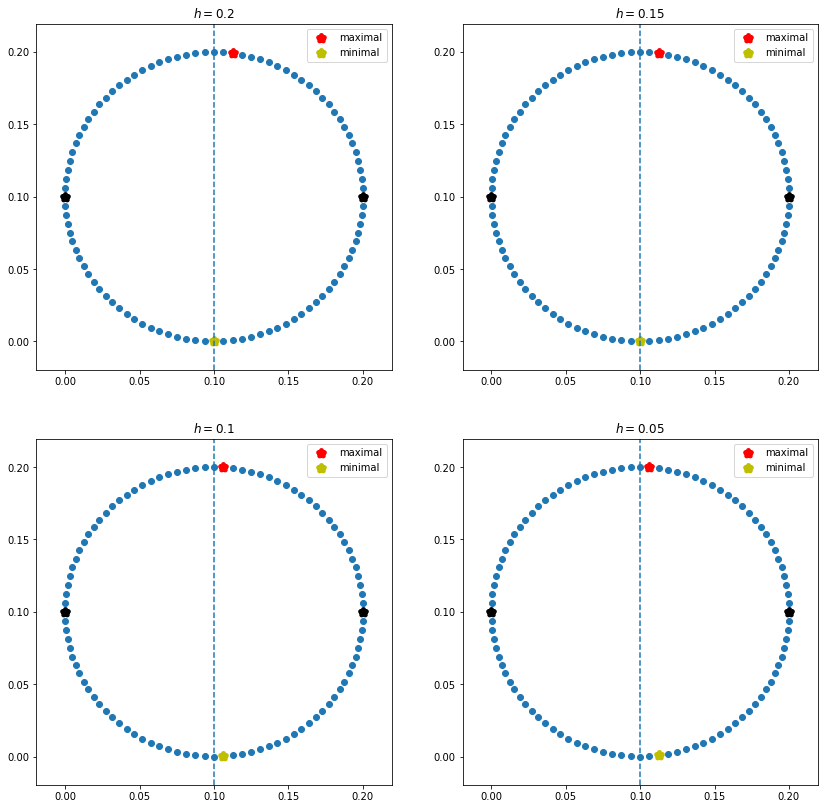

In [28]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))
ax1.scatter(np.array(points_on_sphere).real, np.array(points_on_sphere).imag, label='_nolegend_')
ax1.scatter(np.array(0.1*np.exp(1j*angle_[max_index_02])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[max_index_02])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'red')
ax1.scatter(np.array(0.1*np.exp(1j*angle_[min_index_02])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[min_index_02])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'y')
ax1.scatter(np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).imag,marker = '*', linewidths = 5, color = 'k')
ax1.scatter(np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'k')
ax1.legend(['maximal', 'minimal'])
ax1.axvline(x=0.1, linestyle = '--')
ax1.set_title('$h = 0.2$')

ax2.scatter(np.array(points_on_sphere).real, np.array(points_on_sphere).imag, label='_nolegend_')
ax2.scatter(np.array(0.1*np.exp(1j*angle_[max_index_015])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[max_index_015])+ 0.1 + 0.1j).imag,marker = '*', linewidths = 5, color = 'red')
ax2.scatter(np.array(0.1*np.exp(1j*angle_[min_index_015])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[min_index_015])+ 0.1 + 0.1j).imag,marker = '*', linewidths = 5, color = 'y')
ax2.scatter(np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).imag,marker = '*', linewidths = 5, color = 'k')
ax2.scatter(np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'k')
ax2.legend(['maximal', 'minimal'])
ax2.axvline(x=0.1, linestyle = '--')
ax2.set_title('$h = 0.15$')

ax3.scatter(np.array(points_on_sphere).real, np.array(points_on_sphere).imag, label='_nolegend_')
ax3.scatter(np.array(0.1*np.exp(1j*angle_[max_index_01])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[max_index_01])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5, color = 'red')
ax3.scatter(np.array(0.1*np.exp(1j*angle_[min_index_01])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[min_index_01])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'y')
ax3.scatter(np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).imag,marker = '*', linewidths = 5, color = 'k')
ax3.scatter(np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'k')
ax3.legend(['maximal', 'minimal'])
ax3.axvline(x=0.1, linestyle = '--')
ax3.set_title('$h = 0.1$')

ax4.scatter(np.array(points_on_sphere).real, np.array(points_on_sphere).imag, label='_nolegend_')
ax4.scatter(np.array(0.1*np.exp(1j*angle_[max_index_005])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[max_index_005])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5, color = 'red')
ax4.scatter(np.array(0.1*np.exp(1j*angle_[min_index_005])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[min_index_005])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5, color = 'y')
ax4.scatter(np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[0])+ 0.1 + 0.1j).imag,marker = '*', linewidths = 5, color = 'k')
ax4.scatter(np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).real, np.array(0.1*np.exp(1j*angle_[50])+ 0.1 + 0.1j).imag, marker = '*', linewidths = 5,color = 'k')
ax4.legend(['maximal', 'minimal'])
ax4.axvline(x=0.1, linestyle = '--')
ax4.set_title('$h = 0.05$')
fig.savefig('four spheres with maximal and minimal.pdf')

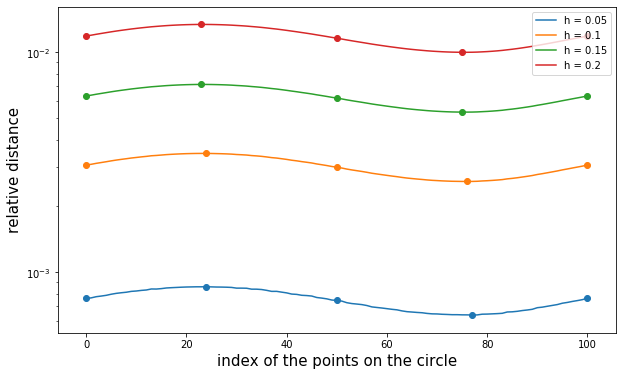

In [29]:
plt.figure(figsize = [10,6])
plt.semilogy(range(len(angle_)), err_005)
plt.semilogy(range(len(angle_)), err_01)
plt.semilogy(range(len(angle_)), err_015)
plt.semilogy(range(len(angle_)), err_02)
plt.scatter([0, max_index_005, 50, min_index_005, 100], [err_005[0], err_005[max_index_005], err_005[50], err_005[min_index_005], err_005[-1]])
plt.scatter([0, max_index_01,  50, min_index_01,  100], [err_01[0],  err_01[max_index_01],   err_01[50],  err_01[min_index_01], err_01[-1]])
plt.scatter([0, max_index_015, 50, min_index_015, 100], [err_015[0], err_015[max_index_015], err_015[50], err_015[min_index_015], err_015[-1]])
plt.scatter([0, max_index_02,  50, min_index_02,  100], [err_02[0],  err_02[max_index_02],   err_02[50], err_02[min_index_02], err_02[-1]])

plt.xlabel('index of the points on the circle', fontsize = 15)
plt.ylabel('relative distance', fontsize = 15)
plt.legend(['h = 0.05', 'h = 0.1', 'h = 0.15', 'h = 0.2'])
plt.savefig('relative distance along the whole circle.pdf')

In [44]:
[err_005[0], err_005[max_index_005], err_005[min_index_005], err_005[-1]]

[0.000760922256212633,
 0.0008598385248546679,
 0.0006397198784531668,
 0.0007639220057582912]

In [2]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits import mplot3d


In [14]:
re = np.arange(0.25, 6.25, 0.25)
im = np.arange(0, 6.25, 0.25)
RE, IM = np.meshgrid(re, im)

In [15]:
im

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  ])

In [17]:
KSSF_value = np.array([Rel_00, Rel_025, Rel_05, Rel_075, Rel_10, Rel_125, Rel_15, Rel_175,Rel_20, Rel_225, Rel_25, Rel_275, Rel_30,
                      Rel_325, Rel_35, Rel_375, Rel_40, Rel_425, Rel_45,Rel_475, Rel_50, Rel_525, Rel_55, Rel_60])

In [18]:
extent = np.min(re), np.max(re), np.min(im), np.max(im)
fig = plt.figure(frameon=False)

<Figure size 432x288 with 0 Axes>

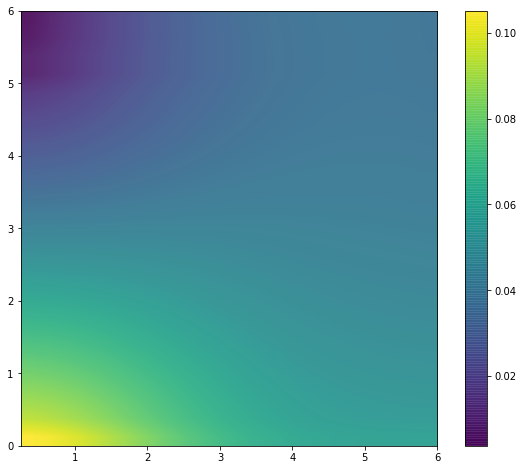

In [23]:
plt.figure(figsize=(10,8))
#Z1 = np.add.outer(range(24), range(24)) % 2  # chessboard
#im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',extent=extent)
Z2 = KSSF_value
im2 = plt.imshow(Z2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',extent=extent)
#plt.imshow(Z2)
plt.colorbar()
plt.savefig('KSSF on the complex plane.pdf')

In [12]:
def func3(x, y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-(x**2 + y**2))

dx, dy = 0.05, 0.05

x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)
X, Y = np.meshgrid(x, y)

In [15]:
extent = np.min(x), np.max(x), np.min(y), np.max(y)
fig = plt.figure(frameon=False)

<Figure size 432x288 with 0 Axes>

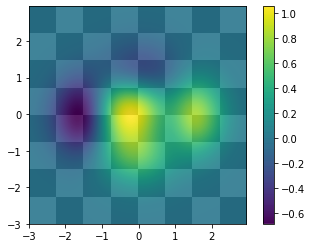

In [20]:
Z1 = np.add.outer(range(8), range(8)) % 2  # chessboard
im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',extent=extent)
Z2 = func3(X,Y)
im2 = plt.imshow(Z2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',
                 extent=extent)
plt.colorbar()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
fig.set_size_inches(15.5, 8.5)
ax = plt.gca(projection="3d")#ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

In [60]:
np.linspace(0,2.5,6)

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [70]:
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
x, y = np.meshgrid(x, y)
r = np.sqrt(x**2 + y**2)
z = np.sin(r)

In [72]:
z

array([[ 0.70886129,  0.11965158, -0.43697552, -0.7820949 , -0.92618484,
        -0.95892427, -0.92618484, -0.7820949 , -0.43697552,  0.11965158],
       [ 0.11965158, -0.58617619, -0.95892427, -0.9712778 , -0.83133918,
        -0.7568025 , -0.83133918, -0.9712778 , -0.95892427, -0.58617619],
       [-0.43697552, -0.95892427, -0.89168225, -0.44749175, -0.02068353,
         0.14112001, -0.02068353, -0.44749175, -0.89168225, -0.95892427],
       [-0.7820949 , -0.9712778 , -0.44749175,  0.30807174,  0.78674913,
         0.90929743,  0.78674913,  0.30807174, -0.44749175, -0.9712778 ],
       [-0.92618484, -0.83133918, -0.02068353,  0.78674913,  0.98776595,
         0.84147098,  0.98776595,  0.78674913, -0.02068353, -0.83133918],
       [-0.95892427, -0.7568025 ,  0.14112001,  0.90929743,  0.84147098,
         0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ],
       [-0.92618484, -0.83133918, -0.02068353,  0.78674913,  0.98776595,
         0.84147098,  0.98776595,  0.78674913

In [1]:
import numpy as np
list_ = [0.005521665373746728+0.054738340054799946j, 0.010895095595231824+0.05376245417034918j, 0.015985719093681367+0.052200828520977176j,
         0.020683720252357454+0.050141579220705945j, 0.024910830280179947+0.04769207510861598j, 0.02862234890123159+0.044967429459468376j,
         0.03180506281519475+0.04208023289392129j, 0.03447237194048381+0.03913272245377095j, 0.03665804306948086+0.03621176302470494j,
         0.03840975404951871+0.03338641418084502j, 0.03978319469963318+0.030707543813848402j, 0.04083711806378869+0.028208875650307837j,
         0.04162946297340067+0.025908924092462902j, 0.042214505086104845+0.023813391292043014j, 0.0426409145398113+0.021917725912057658j,
         0.042950573995581796+0.020209643408997734j, 0.043178014222417495+0.018671482662209228j, 0.043350339768278914+0.017282322740245066j,
         0.0434875343088117+0.01601981599158938j, 0.04360305029103006+0.014861714652708012j, 0.043704599348002346+0.013787082889709529j,
         0.04379506944872051+0.01277719789140031j, 0.04387350277475192+0.011816153791691006j, 0.04393607637939838+0.010891191542511435j]
norm_list = []
for i in range(len(list_)):
    norm_list.append(np.linalg.norm(list_[i]))

In [2]:
norm_list

[0.055016130911347716,
 0.05485530590971247,
 0.054593678326510964,
 0.05424015348636204,
 0.05380598008970562,
 0.053303926392115786,
 0.05274758782243164,
 0.05215088104574001,
 0.05152770034691342,
 0.05089166786419412,
 0.05025590341032923,
 0.04963276012081483,
 0.049033504209700755,
 0.04846794863095324,
 0.04794407473241688,
 0.047467688939622846,
 0.04704216382136846,
 0.04666830441877245,
 0.046344364756294346,
 0.04606621926206461,
 0.04582767350386804,
 0.04562088221389693,
 0.045436832373692795,
 0.04526584651624225]

In [18]:
np.linspace(1,50,20)

array([ 1.        ,  3.57894737,  6.15789474,  8.73684211, 11.31578947,
       13.89473684, 16.47368421, 19.05263158, 21.63157895, 24.21052632,
       26.78947368, 29.36842105, 31.94736842, 34.52631579, 37.10526316,
       39.68421053, 42.26315789, 44.84210526, 47.42105263, 50.        ])

In [4]:
x_axis = np.linspace(1,50,20)
real_axis = [0.014478469650854992, 0.03663388734666083, 0.038187170041832225, 1.030304796353265, 0.9833630710794968, 0.0005202633815123036, 0.9855355421442555,
             0.025336551814446696, 0.9704033323330121, 0.024728499248786295, 0.9931448739027189, 0.03790861963881043, 0.9205382789631446, 0.2078528621967248,
             0.368013707840904, 1.3661096614238197, 1.0268657010552775, 0.43593761382510865, 0.7738489037032446, 0.6198041849949384]

Text(0.5, 1, 'Relative KSSF $\\xi_{\t{rel}}(k)$ with $k \\in [1,50]$')

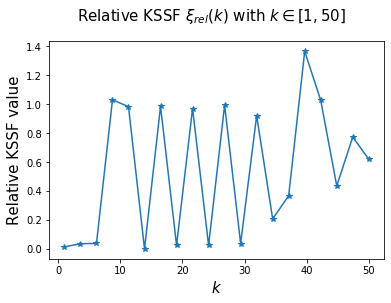

In [38]:
plt.plot(x_axis, real_axis, '*-')
plt.xlabel('$k$', fontsize = 15)
plt.ylabel('Relative KSSF value', fontsize = 15)
plt.suptitle('Relative KSSF $\\xi_{\t{rel}}(k)$ with $k \in [1,50]$', fontsize = 15, y = 1)

In [30]:
imag_axis = [0.014782691162715599, 0.056492087241682906, 0.1092257907850625, 0.17412976119862508, 0.24948245522142387, 0.3327632881863779, 0.42162275702463964,
             0.514244403812571, 0.6093618221054772, 0.7061415382902041, 0.8040497616873793, 0.9027464608669412, 1.0020126559239333, 1.1017040979798438, 
             1.2017228734631622, 1.302000280019557, 1.4024865082122329, 1.5031443544291363, 1.6039453094567404, 1.7048670562981791] 

Text(0.5, 1, 'Relative KSSF $\\xi_{\t{rel}}(\\mathrm{i}k)$ with $k \\in [1,50]$')

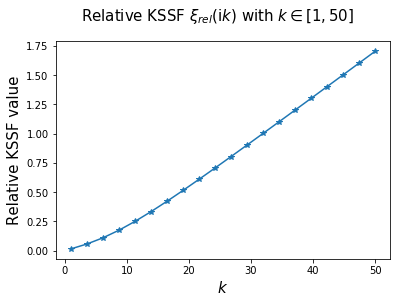

In [37]:
plt.plot(x_axis, imag_axis, '*-')
plt.xlabel('$k$', fontsize = 15)
plt.ylabel('Relative KSSF value', fontsize = 15)
plt.suptitle('Relative KSSF $\\xi_{\t{rel}}(\mathrm{i}k)$ with $k \in [1,50]$', fontsize = 15, y = 1)

In [34]:
diag_axis = [0.01986992376203284, 0.04880818219977112, 0.05959412701520923, 0.07392212207298132, 1.081299401624898, 1.0934413745211706, 1.109842095593058, 
             0.8203580215805165, 0.23779489198355647, 0.8272950614709178, 0.5143062047412872, 0.970445616116647, 1.9503756606046718, 2.2548020370448048, 
             2.349832561099843, 2.5409767212305927, 3.3898583731766125, 3.8298957518943357, 4.6985584694426, 5.830602114285182]

Text(0.5, 1, 'Relative KSSF $\\xi_{\t{rel}}(k + \\mathrm{i}k)$ with $k \\in [1,50]$')

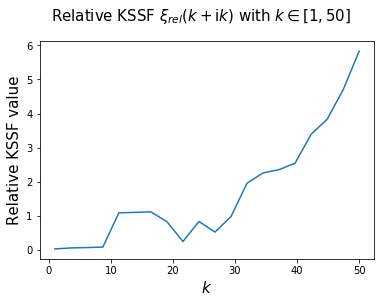

In [36]:
plt.plot(x_axis, diag_axis)
plt.xlabel('$k$', fontsize = 15)
plt.ylabel('Relative KSSF value', fontsize = 15)
plt.suptitle('Relative KSSF $\\xi_{\t{rel}}(k + \mathrm{i}k)$ with $k \in [1,50]$', fontsize = 15, y = 1)

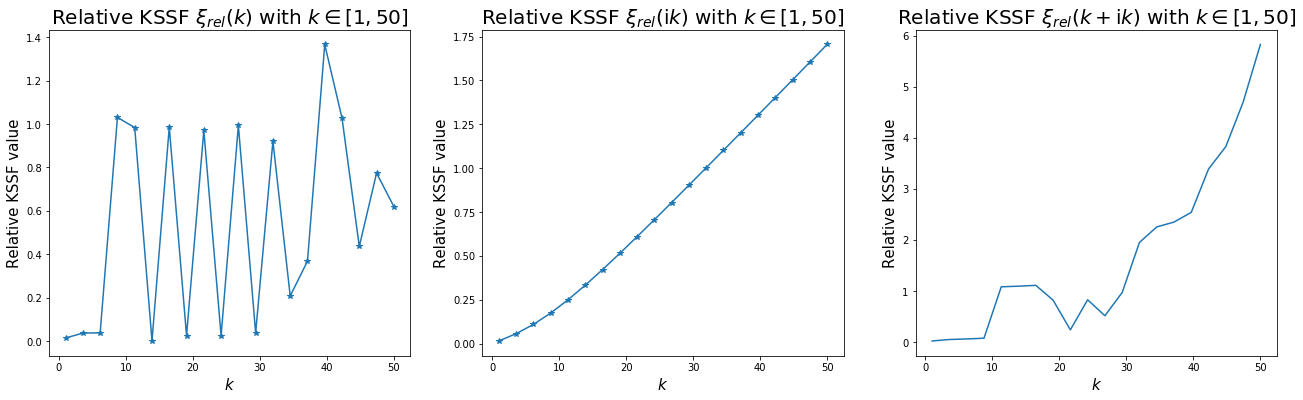

In [54]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(22, 6))
ax1.plot(x_axis, real_axis, '*-')
ax1.set_xlabel('$k$', fontsize = 15)
ax1.set_ylabel('Relative KSSF value', fontsize = 15)
ax1.set_title('Relative KSSF $\\xi_{\t{rel}}(k)$ with $k \in [1,50]$', fontsize = 20, y = 1)

ax2.plot(x_axis, imag_axis, '*-')
ax2.set_xlabel('$k$', fontsize = 15)
ax2.set_ylabel('Relative KSSF value', fontsize = 15)
ax2.set_title('Relative KSSF $\\xi_{\t{rel}}(\mathrm{i}k)$ with $k \in [1,50]$',fontsize = 20, y = 1)

ax3.plot(x_axis, diag_axis)
ax3.set_xlabel('$k$', fontsize = 15)
ax3.set_ylabel('Relative KSSF value', fontsize = 15)
ax3.set_title('Relative KSSF $\\xi_{\t{rel}}(k + \mathrm{i}k)$ with $k \in [1,50]$', fontsize = 20, y = 1)
fig.savefig('Relative KSSF along diff axis.pdf')

In [4]:
# 400 datapoints 
first_100 = [0.0014991026743278592, 0.0033690334556297527, 0.005227728436694561, 0.007069085401665267, 0.00888718246406132,
             0.010676337080171213, 0.012431159974684157, 0.014146603470655739, 0.015818003026993353, 0.01744111169044568,
             0.019012126843979592, 0.020527709407864293, 0.02198499525837768, 0.02338159924823598, 0.024715612184765947, 
             0.02598559122065127, 0.027190544736331784, 0.028329911360339296, 0.029403535298921334, 0.03041163770482418,
             0.031354785516170144, 0.03223385768104241, 0.03305001093344425, 0.03380464425823073, 0.0344993636507726,
             0.035135947376496196, 0.03571631226363358, 0.03624248143844067, 0.036716553840782554, 0.03714067579026071,
             0.03751701480685597, 0.03784773583357852, 0.038134979949503496, 0.03838084561616621, 0.03858737245225591, 
             0.03875652750458301, 0.03889019393536602, 0.038990162027324894, 0.03905812237394594, 0.03909566114837394, 
             0.039104257251839726, 0.03908528121063105, 0.039039995632512384, 0.03896955708349781, 0.03887501905357653,
             0.03875733617239837, 0.03861736928505152, 0.038455890784677906, 0.03827359100789987, 0.03807108507982088,
             0.03784891956069157, 1.0376075795262107, 1.0373474956603397, 1.0370690511940477, 1.0367725887350487, 
             1.036458415845388, 1.0361268150575282, 1.0357780436975108, 1.0354123438678036, 1.035029945732781, 
             1.0346310725656644, 1.0342159444161991, 1.0337847818667936, 1.0333378089607579, 1.0328752559608043,
             1.032397361648732, 1.0319043738221698, 1.031396552487309, 1.030874168756524, 1.0303375089652826, 
             1.0297868706367976, 1.0292225651030416, 1.0286449166940916, 1.028054262635922, 1.027450950672837, 
             1.0268353443938107, -0.9737921855495921, -0.9744312574618835, -0.9750814805671486, -0.9757424550753514, 
             -0.9764137766069608, -0.9770950317124804, -0.9777858019374276, -0.9784856646239991, -0.9791941931861978, 
             -0.9799109576723831, -0.9806355260785765, -0.9813674638291207, -0.9821063357327227, -0.9828517052637336,
             -0.9836031362846347, -0.9843601927005061, -0.9851224389587744, -0.9858894395045934, -0.9866607607860919, 
             -0.9874359701961968, -0.9882146371489662, 0.01100366716064013, 0.010219370341969724, 0.009432896429000203]

second_100 = [0.008644667814219534, 0.007855104584062063, 0.007064623378204364, 0.006273638076862034, 0.0054825612181230695,
              0.00469179925629418, 0.0039017569620006794, 0.003112835046089001, 0.002325431024543316, 0.0015399389859799668, 
              0.0007567485237781422, -2.375469110687085e-05, -0.0008011892285268329, -0.0015751769874154087, -0.0023453456013114073,
              -0.003111326360866598, -0.003872755103860497, -0.004629272748362348, -0.005380522289579246, -0.006126154479239189,
              -0.006865822047766148, -0.007599183716116802, -0.008325902217576078,  -0.009045644122778805, -0.009758080324868827, 
              -0.010462886967107681, -0.011159743053961769, -0.011848331302817094, 0.9874716610360867, 0.9868005433224766, 
              0.9861386214695664, 0.9854861993479304, 0.9848435751677922, 0.9842110463037866, 0.9835889072352624, 
              0.9829774490214368,  0.9823769604825721, 0.9817877283721593, 0.9812100370128539, 0.9806441691223827, 
              0.9800904052561613, -1.0204509753748106, -1.0209796953045225, -1.021495478818428, -1.0219980507455237,
              -1.0224871374733595, -1.022962465708383, -1.0234237644750819, -1.023870760772831, -1.0243031847938782,
              -1.0247207656587871, -1.0251232330147961, -0.02551031669544805, -0.025881745767618487, -0.026237249473218625,
              -0.02657655573973451, -0.026899393427224503, -0.027205488288305733, -0.027494566107996644, -0.02776635020635073, 
              -0.02802056250112724, -0.028256922594802215, -0.028475148063533177, -0.02867495338204347, -0.028856050616200186, 
              -0.029018147866069554, -0.029160950357515057, -0.02928415867605967, -0.029387469702978536, -0.02947057483859999, 
              -0.029533161723917005, -0.02957491316911537, 0.9704044950698236, 0.9704053924056356, 0.9704281129932778, 
              0.9704729978686981, 0.9705403949638822, 0.9706306584297562, 0.9707441485736897, 0.9708812330044851,
              0.9710422864073213, 0.9712276895273431, -1.0285621695797038, -1.0283268940938437, -1.0280660834372648,
              -1.0277793277340963, -1.027466211133485, -1.027126311798139, -1.0267592001721264, -1.0263644413629311,
              -1.0259415943495183, -0.025490212871539925, -0.025009845753156377, -0.024500035819034163, -0.023960322373188146, 
              -0.0233902400797662, -0.02278932027154473, -0.022157091101472706, -0.021493078399993478, -0.0207968055597177]

third_100 = [-0.02006779445068846, -0.019305566534526822, -0.018509642078603245, -0.01767954162222564, -0.016814786789169294,
             -0.015914900617137774, -0.014979406317383901, -0.014007831620313575, -0.012999706636166402, 0.9880454355397764,
             0.9891280572116926, 0.9902486163329772, 0.9914075651632684, 0.9926053505715422, 0.9938424140954734,
             0.9951191898156472, 0.9964361045973064, -1.0022064214760722, -1.000807976033901, -0.9993681551080958,
             -0.9978865618253376, -0.9963628098267501, -0.9947965188422715, -0.9931873190460863, -0.9915348492222907, 
             -0.9898387575151338, 0.011901300158602237, 0.013685658164750607, 0.015514642269326258, 0.0173885693867039,
             0.019307748323563537, 0.021272479651193454, 0.023283055709762877, 0.025339761876031368, 0.027442877210639975, 
             0.029592672649256812, 0.03178941552409074, 0.034033366991554834, 0.03632478391498637, 0.03866392028465587, 
             0.041051027337016974, 0.043486355010960584, 0.04597015260348471, 1.0485026720264687, 1.0510841666463806, 
             1.0537148952614042, 1.056395122610327, 1.0591251209019943, 1.0619051725401412, 1.064735572604537, 
             -0.9323833693878092, -0.9294513266866682, -0.926467950087218, -0.9234328656190334, -0.9203456707618658, 
             -0.9172059317307909, -0.9140131755081844, -0.9107668874574172, -0.9074665038352352, -0.9041114071549736, 
             0.099299084361943, 0.10276572166929036, 0.10628933447133752, 0.10987084363646374, 0.11351126817588297, 
             0.11721173826069234, 0.12097351042959188, 0.12479798444417937, 0.12868671521878752, 0.1326414380116895, 
             0.13666408264765012, 0.14075680376839325, 0.1449220031878183, 0.14916236154288204, 0.15348086906072825, 
             0.1578808631467262, 0.16236607181277293, 1.1669406583542041, 1.1716092749605789, 1.176377121779846, 
             1.1812500106069654, 1.1862344417021036, 1.1913376852566735, -0.8034321219756706, -0.7980658701100003, 
             -0.7925533574158584, -0.7868831488781635, -0.7810424241326535, -0.7750167995971854, -0.7687901263923582, 
             -0.7623442598463286, -0.7556587987025023, -0.7487107825698627, -0.7414743456009937, -0.7339203255000691,
             -0.7260158031390249, 0.28227641795578245, 0.2909984135120134, 0.30019783197317607, 0.3099286902229082]

forth_100 = [0.32025228312619836, 0.33123822190681396, 0.34296560782530006, 0.3555243455660825, 0.3690165793479218,
             0.38355822961518304, 0.39928054589284734, 0.4163315540960759, 0.434877178636405, 0.4551016532467092, 
             0.477206676047532, 0.5014084677963543, 0.5279315955166242, 0.5569981664950452, 0.5888109409823777, 
             0.6235294340655929, -1.338760386528799, -1.2980792880143013, -1.2545833027059503, -1.2085766235694433,
             -1.1604980263588396, -1.1108764908031283, -1.060263609307786, -1.0091615873150794, 0.04203155765150069,
             0.09304572144581645, 0.14373031209887338, 0.19402283432309692, 0.243907182568355, 0.2933725821326735, 
             0.34238033459551726, 0.39084193415761487, 0.4386096253499901, 0.4854787380230272, 0.531199877471118, 
             0.5754979321198628, 0.6180942598256775, 0.6587282559749569, 0.697175187776146, 0.7332582683810762, 
             0.7668543365728027, 0.797893693070149, -1.1736445899358872, -1.1477402621359083, -1.1243408574122147, 
             -1.103370795885546, -1.0847398190386917, -1.0683502848404098, -1.0541031559473861, -0.04190268072244645,
             -0.03165989002724135, -0.023295068208809402, -0.016739343391340467, -0.011935520955487009, -0.00883825221825067,
             -0.00741355741586103, -0.007637682188880992, -0.009495221149989696, -0.012976394764019869, -0.018073344916744158,
             -0.02477534398875782, -0.033062872918305765, -0.042900697402218496, -0.05423031567786979, -0.06696250675492085, 
             -0.08097104643137253, -0.09608901769116032, 0.8878909459010699, 0.8712114466582269, 0.8541400198185347, 
             0.836954749360145, 0.8199278562047072, 0.8033098797317985, 0.7873168914231464, 0.7721223352385972, 
             0.7578539385248614, 0.7445951285153005, 0.732389730102214, 0.7212485355006912, 0.7111565104170822, 
             -0.297920296638428, -1.3060286685551228, -1.3132232086518967, -1.3195624323565067, -0.32510585666765324, 
             -0.32991194228146153, -0.3340367073566042, -0.3375328583589582, -0.34044930640711785, -0.34283094785941964, 
             -0.34471863778657325, -0.34614927899108705, -0.34715599290179633, -0.3477683251700563, -0.3480124764026257, 
             -0.34791153087342075, -0.3474856841561285, -0.34675244693680374, -0.3457268428255032, -0.34442157506084764]

In [6]:
new_list = first_100 + second_100 + third_100 + forth_100 

In [7]:
for i in range(400):
    if abs(new_list[i])>1 and new_list[i] > 0:
        new_list[i] -= 1
    elif abs(new_list[i])>1 and new_list[i] < 0:
        new_list[i] += 1

In [ ]:
for i in range(400,)

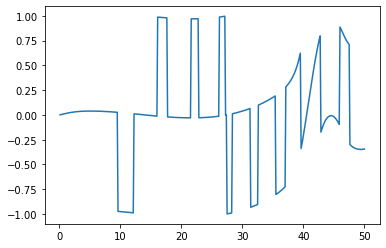

In [8]:
plt.plot(np.linspace(0.1,50, 400), new_list)

In [24]:
_list1 = [0.0014991026743278592, 0.0033690334556297527, 0.005227728436694561, 0.007069085401665267, 0.00888718246406132, 
          0.010676337080171213, 0.012431159974684157, 0.014146603470655739, 0.015818003026993353, 0.01744111169044568,
          0.019012126843979592, 0.020527709407864293, 0.02198499525837768, 0.02338159924823598, 0.024715612184765947,
          0.02598559122065127, 0.027190544736331784, 0.028329911360339296, 0.029403535298921334, 0.03041163770482418, 
          0.031354785516170144, 0.03223385768104241, 0.03305001093344425, 0.03380464425823073, 0.0344993636507726,
          0.035135947376496196, 0.03571631226363358, 0.03624248143844067, 0.036716553840782554, 0.03714067579026071, 
          0.03751701480685597, 0.03784773583357852, 0.038134979949503496, 0.03838084561616621, 0.03858737245225591,
          0.03875652750458301, 0.03889019393536602, 0.038990162027324894, 0.03905812237394594, 0.03909566114837394, 
          0.039104257251839726, 0.03908528121063105, 0.039039995632512384, 0.03896955708349781, 0.03887501905357653, 
          0.03875733617239837, 0.03861736928505152, 0.038455890784677906, 0.03827359100789987, 0.03807108507982088,
          0.03784891956069157, 0.037607579526210744, 0.03734749566033968, 0.037069051194047686, 0.03677258873504874, 
          0.036458415845388004, 0.03612681505752824, 0.03577804369751081, 0.035412343867803564, 0.035029945732780954,
          0.034631072565664445, 0.03421594441619913, 0.03378478186679357, 0.033337808960757886, 0.03287525596080432,
          0.03239736164873208, 0.03190437382216982, 0.03139655248730899, 0.030874168756523934, 0.030337508965282645,
          0.029786870636797635, 0.029222565103041553, 0.028644916694091638, 0.028054262635921923, 0.027450950672837093,
          0.026835344393810745, 0.026207814450407874, 0.025568742538116473, 0.024918519432851394, 0.0242575449246486, 
          0.023586223393039174, 0.022904968287519645, 0.02221419806257241, 0.021514335376000893, 0.020805806813802175,
          0.02008904232761688, 0.019364473921423486, 0.018632536170879344, 0.017893664267277343, 0.017148294736266445,
          0.016396863715365306, 0.01563980729949388, 0.014877561041225618, 0.014110560495406599, 0.013339239213908116,
          0.012564029803803223, 0.01178536285103382, 0.01100366716064013, 0.010219370341969724, 0.009432896429000203]

_list2 = [0.008644667814219534, 0.007855104584062063, 0.007064623378204364, 0.006273638076862034, 0.0054825612181230695,
              0.00469179925629418, 0.0039017569620006794, 0.003112835046089001, 0.002325431024543316, 0.0015399389859799668, 
              0.0007567485237781422, -2.375469110687085e-05, -0.0008011892285268329, -0.0015751769874154087, -0.0023453456013114073,
              -0.003111326360866598, -0.003872755103860497, -0.004629272748362348, -0.005380522289579246, -0.006126154479239189,
              -0.006865822047766148, -0.007599183716116802, -0.008325902217576078,  -0.009045644122778805, -0.009758080324868827, 
              -0.010462886967107681, -0.011159743053961769, -0.011848331302817094, -0.012528338963913255, -0.013199456677523425,
          -0.013861378530433566, -0.014513800652069642, -0.015156424832207804, -0.01578895369621336, -0.016411092764737623,
          -0.0170225509785632, -0.01762303951742794, -0.01821227162784067, -0.01878996298714608, -0.019355830877617275, 
          -0.019909594743838688, -0.020450975374810554, -0.020979695304522483, -0.02149547881842806 , -0.021998050745523745, 
          -0.02248713747335951, -0.022962465708382895 , -0.023423764475081876 , -0.023870760772831012 , -0.024303184793878163 ,
          -0.024720765658787114, -0.02512323301479613, -0.02551031669544805, -0.025881745767618487, -0.026237249473218625,
              -0.02657655573973451, -0.026899393427224503, -0.027205488288305733, -0.027494566107996644, -0.02776635020635073, 
              -0.02802056250112724, -0.028256922594802215, -0.028475148063533177, -0.02867495338204347, -0.028856050616200186, 
              -0.029018147866069554, -0.029160950357515057, -0.02928415867605967, -0.029387469702978536, -0.02947057483859999, 
              -0.029533161723917005, -0.02957491316911537, -0.029595504930176375, -0.029594607594364386, -0.029571887006722197,
          -0.029527002131301883, -0.029459605036117775, -0.029369341570243845, -0.029255851426310264, -0.029118766995514855, 
          -0.028957713592678735, -0.028772310472656937, -0.0285621695797038, -0.0283268940938437, -0.0280660834372648,
              -0.0277793277340963, -0.027466211133485, -0.027126311798139, -0.0267592001721264, -0.0263644413629311,
              -0.0259415943495183, -0.025490212871539925, -0.025009845753156377, -0.024500035819034163, -0.023960322373188146, 
              -0.0233902400797662, -0.02278932027154473, -0.022157091101472706, -0.021493078399993478, -0.0207968055597177]

_list3 = [-0.02006779445068846, -0.019305566534526822, -0.018509642078603245, -0.01767954162222564, -0.016814786789169294,
             -0.015914900617137774, -0.014979406317383901, -0.014007831620313575, -0.012999706636166402, -0.011954564460223582,
          -0.010871942788307387, -0.009751383667022773, -0.008592434836731555, -0.0073946494284578, -0.006157585904526641, 
          -0.004880810184352824, -0.00356389540269364, -0.0022064214760721956, -0.0008079760339010367, 0.0006318448919041542,
          0.002113438174662363, 0.0036371901732499268, 0.005203481157728507, 0.006812680953913741, 0.008465150777709263,
          0.010161242484866162, 0.011901300158602237, 0.013685658164750607, 0.015514642269326258, 0.0173885693867039, 
          0.019307748323563537, 0.021272479651193454, 0.023283055709762877, 0.025339761876031368, 0.027442877210639975, 
          0.029592672649256812, 0.03178941552409074, 0.034033366991554834, 0.03632478391498637, 0.03866392028465587, 
          0.041051027337016974, 0.043486355010960584, 0.04597015260348471, 0.04850267202646874, 0.0510841666463806, 
          0.05371489526140416, 0.056395122610326975, 0.05912512090199429, 0.06190517254014116, 0.0647355726045371, 
          0.06761663061219081, 0.07054867331333181, 0.07353204991278195, 0.07656713438096663, 0.0796543292381342, 
          0.0827940682692091, 0.0859868244918156, 0.08923311254258282, 0.0925334961647648, 0.09588859284502638, 
          0.099299084361943, 0.10276572166929036, 0.10628933447133752, 0.10987084363646374, 0.11351126817588297, 
          0.11721173826069234, 0.12097351042959188, 0.12479798444417937, 0.12868671521878752, 0.1326414380116895, 
          0.13666408264765012, 0.14075680376839325, 0.1449220031878183, 0.14916236154288204, 0.15348086906072825, 
          0.1578808631467262, 0.16236607181277293, 0.16694065835420413, 0.17160927496057887, 0.176377121779846, 
          0.18125001060696544, 0.18623444170210357, 0.1913376852566735, 0.1965678780243294, 0.2019341298899997, 
          0.20744664258414158, 0.21311685112183654, 0.21895757586734654, 0.2249832004028146, 0.23120987360764178, 
          0.2376557401536714, 0.2443412012974977, 0.2512892174301373, 0.2585256543990063, 0.26607967449993086, 
          0.2739841968609751, 0.28227641795578245, 0.2909984135120134, 0.30019783197317607, 0.3099286902229082]

_list4 = [0.32025228312619836, 0.33123822190681396, 0.34296560782530006, 0.3555243455660825, 0.3690165793479218,
             0.38355822961518304, 0.39928054589284734, 0.4163315540960759, 0.434877178636405, 0.4551016532467092, 
             0.477206676047532, 0.5014084677963543, 0.5279315955166242, 0.5569981664950452, 0.5888109409823777, 
             0.6235294340655929, 0.6612396134712011, 0.7019207119856987, 0.7454166972940497, 0.7914233764305567, 
          0.8395019736411604, 0.8891235091968717, 0.939736390692214, 0.9908384126849206, 0.04203155765150069,
             0.09304572144581645, 0.14373031209887338, 0.19402283432309692, 0.243907182568355, 0.2933725821326735, 
             0.34238033459551726, 0.39084193415761487, 0.4386096253499901, 0.4854787380230272, 0.531199877471118, 
             0.5754979321198628, 0.6180942598256775, 0.6587282559749569, 0.697175187776146, 0.7332582683810762,
             0.7668543365728027, 0.797893693070149, 0.8263554100641128, 0.8522597378640917, 0.8756591425877853, 
          0.8966292041144539, 0.9152601809613083, 0.9316497151595902, 0.9458968440526139, 0.9580973192775536, 
          0.9683401099727587, 0.9767049317911906, 0.9832606566086596, 0.988064479044513, 0.9911617477817494, 
          0.992586442584139, 0.992362317811119, 0.9905047788500103, 0.9870236052359802, 0.9819266550832558, 
          0.9752246560112422, 0.9669371270816942, 0.9570993025977815, 0.9457696843221302, 0.9330374932450791, 
          0.9190289535686275, 0.9039109823088397, 0.8878909459010699, 0.8712114466582269, 0.8541400198185347, 
             0.836954749360145, 0.8199278562047072, 0.8033098797317985, 0.7873168914231464, 0.7721223352385972, 
             0.7578539385248614, 0.7445951285153005, 0.732389730102214, 0.7212485355006912, 0.7111565104170822, 
          0.702079703361572, 0.6939713314448772, 0.6867767913481033, 0.6804375676434933, 0.6748941433323468,
          0.6700880577185384, 0.6659632926433958, 0.6624671416410418, 0.6595506935928821, 0.6571690521405804, 
          0.6552813622134268, 0.653850721008913, 0.6528440070982037, 0.6522316748299437, 0.6519875235973742, 
          0.6520884691265793, 0.6525143158438715, 0.6532475530631963, 0.6542731571744969, 0.6555784249391523]

In [ ]:
#_lt = []
for i in range(100):
    print(new_list[i+300], forth_100[i])

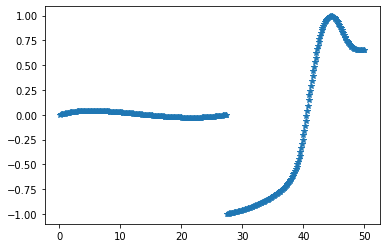

In [25]:
plt.plot(np.linspace(0.1, 50, 400)[0:],_list1 + _list2 + _3_100 + _4_100,'*' )#_list1 + _list2 + _list3 + _list4

In [77]:
new_list = first_100 + second_100 + thrid_100 + forth_100 
for i in range(400):
    if abs(new_list[i])>1 and new_list[i] > 0:
        new_list[i] -= 1
    elif abs(new_list[i])>1 and new_list[i] < 0:
        new_list[i] += 1

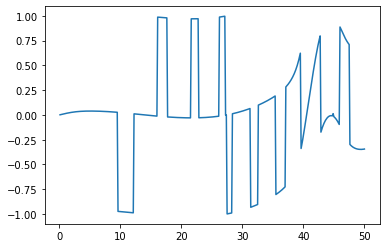

In [78]:
plt.plot(np.linspace(0.1, 50, 400), new_list)

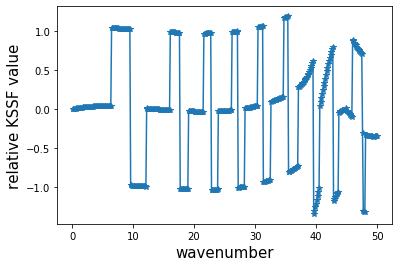

In [34]:
plt.plot(np.linspace(0.1, 50, 400), first_100 + second_100 + thrid_100 + forth_100 , '*-')
plt.xlabel('wavenumber', fontsize = 15)
plt.ylabel('relative KSSF value', fontsize = 15)
plt.savefig('oscillatory relative KSSF.pdf')

In [20]:
_lt = []
for i in [ 0.9880454355397764,
             0.9891280572116926, 0.9902486163329772, 0.9914075651632684, 0.9926053505715422, 0.9938424140954734,
             0.9951191898156472, 0.9964361045973064]:
    i -= 1
    _lt.append (i)
print(_lt)

[-0.011954564460223582, -0.010871942788307387, -0.009751383667022773, -0.008592434836731555, -0.0073946494284578, -0.006157585904526641, -0.004880810184352824, -0.00356389540269364]


In [35]:

(22.861 - 17.733)

5.128

In [36]:
(27.238 - 22.861)

4.376999999999999

In [37]:
(31.365 - 27.238)

4.126999999999999

In [38]:
(35.492 - 31.365)

4.126999999999999

In [39]:
(39.619 - 35.492)

4.1270000000000024

In [32]:
1/(42.871 - 39.619)

0.3075030750307501

In [83]:
-0.0129763947640198 + 1

0.9870236052359802

In [9]:
np.linspace(0.1,50,400)[42]

5.352631578947368

In [10]:
np.linspace(0.1,50,400)[172]

21.61077694235589

In [12]:
1/(21.61077694235589 - 5.352631578947368)*2

0.12301526129181438

In [21]:
_3_100 = [-0.02006779445068846, -0.019305566534526822, -0.018509642078603245, -0.01767954162222564, -0.016814786789169294,
             -0.015914900617137774, -0.014979406317383901, -0.014007831620313575, -0.012999706636166402, -0.011954564460223582, 
          -0.010871942788307387, -0.009751383667022773, -0.008592434836731555, -0.0073946494284578, -0.006157585904526641, 
          -0.004880810184352824, -0.00356389540269364, -0.0022064214760722, -0.000807976033901, -0.9993681551080958,
             -0.9978865618253376, -0.9963628098267501, -0.9947965188422715, -0.9931873190460863, -0.9915348492222907, 
             -0.9898387575151338, -0.9880986998413978, -0.9863143418352494, -0.9844853577306737, -0.9826114306132961, 
          -0.9806922516764365, -0.9787275203488065, -0.9767169442902371, -0.9746602381239686, -0.97255712278936, 
          -0.9704073273507432, -0.9682105844759092, -0.9659666330084452, -0.9636752160850136, -0.9613360797153441, 
          -0.9589489726629831, -0.9565136449890395, -0.9540298473965153, -0.9514973279735313, -0.9489158333536194, 
          -0.9462851047385958, -0.943604877389673, -0.9408748790980057, -0.9380948274598588, -0.9352644273954629, 
             -0.9323833693878092, -0.9294513266866682, -0.926467950087218, -0.9234328656190334, -0.9203456707618658, 
             -0.9172059317307909, -0.9140131755081844, -0.9107668874574172, -0.9074665038352352, -0.9041114071549736, 
             -0.900700915638057, -0.8972342783307097, -0.8937106655286625, -0.8901291563635363, -0.886488731824117, 
          -0.8827882617393077, -0.8790264895704081, -0.8752020155558207, -0.8713132847812125, -0.8673585619883105, 
          -0.8633359173523498, -0.8592431962316067, -0.8550779968121817, -0.8508376384571179, -0.8465191309392718, 
          -0.8421191368532738, -0.837633928187227, -0.8330593416457959, -0.8283907250394211, -0.823622878220154, 
          -0.8187499893930346, -0.8137655582978964, -0.8086623147433265, -0.8034321219756706, -0.7980658701100003, 
             -0.7925533574158584, -0.7868831488781635, -0.7810424241326535, -0.7750167995971854, -0.7687901263923582, 
             -0.7623442598463286, -0.7556587987025023, -0.7487107825698627, -0.7414743456009937, -0.7339203255000691,
             -0.7260158031390249, -0.7177235820442176, -0.7090015864879866, -0.6998021680268239, -0.6900713097770919]


_4_100 = [-0.6797477168738016, -0.668761778093186, -0.6570343921746999, -0.6444756544339175, -0.6309834206520781, 
         -0.616441770384817, -0.6007194541071527, -0.5836684459039241, -0.565122821363595, -0.5448983467532909, 
         -0.522793323952468, -0.4985915322036457, -0.47206840448337584, -0.4430018335049548, -0.41118905901762226,
         -0.3764705659344071, -0.338760386528799, -0.2980792880143013, -0.2545833027059503, -0.2085766235694433,
        -0.1604980263588396, -0.1108764908031283, -0.060263609307786, -0.0091615873150794, 0.04203155765150069,
             0.09304572144581645, 0.14373031209887338, 0.19402283432309692, 0.243907182568355, 0.2933725821326735, 
             0.34238033459551726, 0.39084193415761487, 0.4386096253499901, 0.4854787380230272, 0.531199877471118, 
             0.5754979321198628, 0.6180942598256775, 0.6587282559749569, 0.697175187776146, 0.7332582683810762, 
             0.7668543365728027, 0.797893693070149, 0.8263554100641128, 0.8522597378640917, 0.8756591425877853, 
         0.8966292041144539, 0.9152601809613083, 0.9316497151595902, 0.9458968440526139,0.9580973192775536, 
         0.9683401099727587, 0.9767049317911906, 0.9832606566086596, 0.988064479044513, 0.9911617477817494, 
         0.992586442584139, 0.992362317811119, 0.9905047788500103, 0.9870236052359801, 0.9819266550832558, 
         0.9752246560112422, 0.9669371270816942, 0.9570993025977815, 0.9457696843221302, 0.9330374932450791, 
         0.9190289535686275, 0.9039109823088397, 0.8878909459010699, 0.8712114466582269, 0.8541400198185347, 
             0.836954749360145, 0.8199278562047072, 0.8033098797317985, 0.7873168914231464, 0.7721223352385972, 
             0.7578539385248614, 0.7445951285153005, 0.732389730102214, 0.7212485355006912, 0.7111565104170822, 
             0.702079703361572, 0.6939713314448772, 0.6867767913481033, 0.6804375676434933, 0.6748941433323468, 
         0.6700880577185384, 0.6659632926433958, 0.6624671416410418, 0.6595506935928821, 0.6571690521405804, 
         0.6552813622134268, 0.653850721008913, 0.6528440070982037, 0.6522316748299437, 0.6519875235973742, 
         0.6520884691265793, 0.6525143158438715, 0.6532475530631963, 0.6542731571744969, 0.6555784249391523]

In [4]:
Alex = [ 0.0430362, 0.00467757, 0.00101948]
h_02_3 = [0.00102593, 0.00101719, 0.00101330, 0.00101124]
h_015_3 = [0.00103192, 0.00102315, 0.00101925, 0.00101718]
h_01_3 = [0.00103545, 0.00102666, 0.00102275, 0.00102068]
h_005_3 = [0.00103796, 0.00102915, 0.00102524 , 0.00102317]

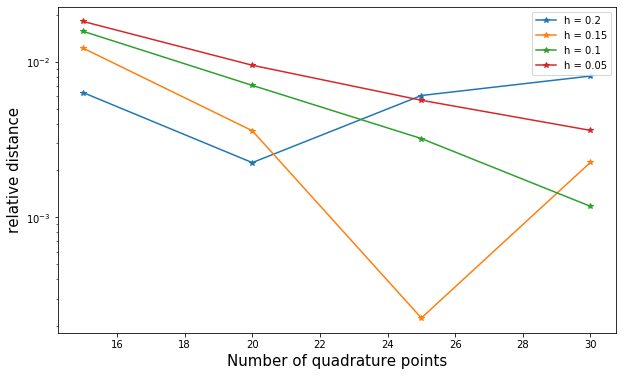

In [23]:
plt.figure(figsize = [10,6])
plt.semilogy([15,20,25,30], [abs(Alex[2] - h_02_3[0])/Alex[2], abs(Alex[2] - h_02_3[1])/Alex[2], 
                             abs(Alex[2] - h_02_3[2])/Alex[2], abs(Alex[2] - h_02_3[3])/Alex[2]], '*-')

plt.semilogy([15,20,25,30], [abs(Alex[2] - h_015_3[0])/Alex[2], abs(Alex[2] - h_015_3[1])/Alex[2], 
                             abs(Alex[2] - h_015_3[2])/Alex[2], abs(Alex[2] - h_015_3[3])/Alex[2]], '*-')

plt.semilogy([15,20,25,30], [abs(Alex[2] - h_01_3[0])/Alex[2], abs(Alex[2] - h_01_3[1])/Alex[2], 
                             abs(Alex[2] - h_01_3[2])/Alex[2], abs(Alex[2] - h_01_3[3])/Alex[2]], '*-')

plt.semilogy([15,20,25,30], [abs(Alex[2] - h_005_3[0])/Alex[2], abs(Alex[2] - h_005_3[1])/Alex[2], 
                             abs(Alex[2] - h_005_3[2])/Alex[2], abs(Alex[2] - h_005_3[3])/Alex[2]], '*-')

plt.legend(['h = 0.2', 'h = 0.15', 'h = 0.1', 'h = 0.05'])
plt.xlabel('Number of quadrature points', fontsize = 15)
plt.ylabel('relative distance', fontsize = 15)
#plt.savefig('num of quad pts.pdf')

In [6]:
h_02_05 = [0.042484506794880784, 0.04252747355860449,0.04255157818427264, 0.042566832609751026]
h_015_05 = [0.04327638556807692, 0.043307825800406145,0.043325496600698093, 0.04333668498967205]
h_01_05 = [0.04376301140212692, 0.04378745428729573, 0.04380122826937387,0.04380996060703049]
h_005_05 = [0.044124405965019146, 0.04414292087373472, 0.04415340734185159,0.04416005723096838]

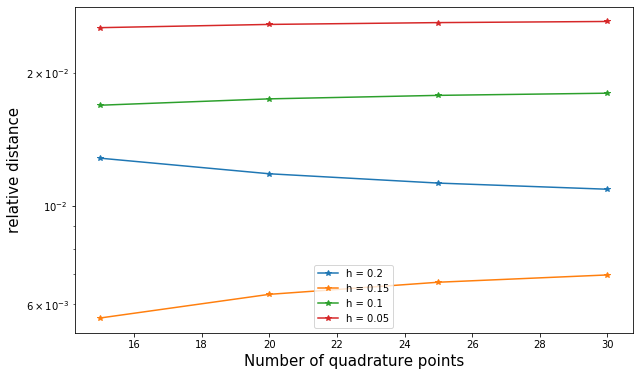

In [10]:
plt.figure(figsize = [10,6])
plt.semilogy([15,20,25,30], [abs(Alex[0] - h_02_05[0])/Alex[0], abs(Alex[0] - h_02_05[1])/Alex[0], 
                             abs(Alex[0] - h_02_05[2])/Alex[0], abs(Alex[0] - h_02_05[3])/Alex[0]], '*-')

plt.semilogy([15,20,25,30], [abs(Alex[0] - h_015_05[0])/Alex[0], abs(Alex[0] - h_015_05[1])/Alex[0], 
                             abs(Alex[0] - h_015_05[2])/Alex[0], abs(Alex[0] - h_015_05[3])/Alex[0]], '*-')

plt.semilogy([15,20,25,30], [abs(Alex[0] - h_01_05[0])/Alex[0], abs(Alex[0] - h_01_05[1])/Alex[0], 
                             abs(Alex[0] - h_01_05[2])/Alex[0], abs(Alex[0] - h_01_05[3])/Alex[0]], '*-')

plt.semilogy([15,20,25,30], [abs(Alex[0] - h_005_05[0])/Alex[0], abs(Alex[0] - h_005_05[1])/Alex[0], 
                             abs(Alex[0] - h_005_05[2])/Alex[0], abs(Alex[0] - h_005_05[3])/Alex[0]], '*-')

plt.legend(['h = 0.2', 'h = 0.15', 'h = 0.1', 'h = 0.05'])
plt.xlabel('Number of quadrature points', fontsize = 15)
plt.ylabel('relative distance', fontsize = 15)
plt.savefig('num of quad pts Z is 05.pdf')

In [3]:
N = [20, 50, 100, 150, 200]
# 0.00101948
new_h_02_03 = [0.0010171903063033812, 0.0010083425473856134, 0.0010071583866175537]
new_h_015_03 = [0.0010231501919622393, 0.0010142702952203742, 0.0010130818345556061]
new_h_01_03 = [0.0010266636493035802, 0.001017764562300724, 0.0010165735407339166]
new_h_005_03 = [0.0010291599297457298, 0.0010202473496997815]

In [24]:
# 0.00467757
new_h_02_15 = [0.004608327155831826, 0.004598114824946916, 0.004596749632945796]
new_h_015_15 = [0.0046463126774433355, 0.004636070478058389, 0.004634701274824006]
new_h_01_15 = [0.004668668076015633, 0.00465840811036533, 0.00465703652947531]
new_h_005_15 = [0.004684510574395271, 0.004674238142285929]

In [22]:
# 0.0430362
new_h_02_05 = [0.04252747355860449, 0.04259493529255756, 0.042613104810191406]
new_h_015_05 = [0.043307825800406145, 0.043357281300431066, 0.043370544573403655]
new_h_01_05 = [0.04378745428729573, 0.04382604037168638, 0.04383637117948504]
new_h_005_05 = [0.04414292087373472, 0.04417229480142186]
#new_h_003_05 = [0.044202172883089696]

In [7]:
Alex = [0.0430362, 0.00467757, 0.00101948]

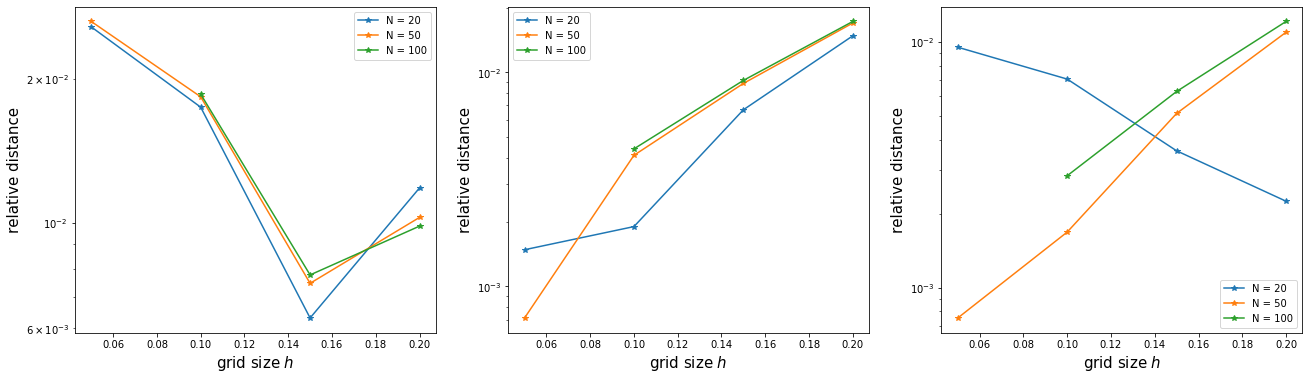

In [32]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(22, 6))
ax1.semilogy([0.05, 0.1, 0.15, 0.2], [abs(new_h_005_05[0] - Alex[0])/Alex[0], abs(new_h_01_05[0] - Alex[0])/Alex[0], 
                                      abs(new_h_015_05[0] - Alex[0])/Alex[0], abs(new_h_02_05[0] - Alex[0])/Alex[0]], '*-')

ax1.semilogy([0.05, 0.1, 0.15, 0.2], [abs(new_h_005_05[1] - Alex[0])/Alex[0], abs(new_h_01_05[1] - Alex[0])/Alex[0], 
                                      abs(new_h_015_05[1] - Alex[0])/Alex[0], abs(new_h_02_05[1] - Alex[0])/Alex[0]], '*-')

ax1.semilogy([0.1, 0.15, 0.2], [abs(new_h_01_05[2] - Alex[0])/Alex[0], 
                                      abs(new_h_015_05[2] - Alex[0])/Alex[0], abs(new_h_02_05[2] - Alex[0])/Alex[0]], '*-')
ax1.set_xlabel('grid size $h$', fontsize = 15)
ax1.set_ylabel('relative distance', fontsize = 15)
ax1.legend(['N = 20', 'N = 50', 'N = 100'])

ax2.semilogy([0.05, 0.1, 0.15, 0.2], [abs(new_h_005_15[0] - Alex[1])/Alex[1], abs(new_h_01_15[0] - Alex[1])/Alex[1], 
                                      abs(new_h_015_15[0] - Alex[1])/Alex[1], abs(new_h_02_15[0] - Alex[1])/Alex[1]], '*-')

ax2.semilogy([0.05, 0.1, 0.15, 0.2], [abs(new_h_005_15[1] - Alex[1])/Alex[1], abs(new_h_01_15[1] - Alex[1])/Alex[1], 
                                      abs(new_h_015_15[1] - Alex[1])/Alex[1], abs(new_h_02_15[1] - Alex[1])/Alex[1]], '*-')

ax2.semilogy([0.1, 0.15, 0.2], [abs(new_h_01_15[2] - Alex[1])/Alex[1], 
                                      abs(new_h_015_15[2] - Alex[1])/Alex[1], abs(new_h_02_15[2] - Alex[1])/Alex[1]], '*-')

ax2.set_xlabel('grid size $h$', fontsize = 15)
ax2.set_ylabel('relative distance', fontsize = 15)
ax2.legend(['N = 20', 'N = 50', 'N = 100'])

ax3.semilogy([0.05, 0.1, 0.15, 0.2], [abs(new_h_005_03[0] - Alex[2])/Alex[2], abs(new_h_01_03[0] - Alex[2])/Alex[2], 
                                      abs(new_h_015_03[0] - Alex[2])/Alex[2], abs(new_h_02_03[0] - Alex[2])/Alex[2]], '*-')

ax3.semilogy([0.05, 0.1, 0.15, 0.2], [abs(new_h_005_03[1] - Alex[2])/Alex[2], abs(new_h_01_03[1] - Alex[2])/Alex[2], 
                                      abs(new_h_015_03[1] - Alex[2])/Alex[2], abs(new_h_02_03[1] - Alex[2])/Alex[2]], '*-')

ax3.semilogy([0.1, 0.15, 0.2], [abs(new_h_01_03[2] - Alex[2])/Alex[2], 
                                      abs(new_h_015_03[2] - Alex[2])/Alex[2], abs(new_h_02_03[2] - Alex[2])/Alex[2]], '*-')
ax3.set_xlabel('grid size $h$', fontsize = 15)
ax3.set_ylabel('relative distance', fontsize = 15)
ax3.legend(['N = 20', 'N = 50', 'N = 100'])
fig.savefig('need to update.pdf')